# How to study the MIAS dataset

In this notebook, we illustrate how FrImCla can be employed to classify images. We have to train the framework to make these classifications. In particular, we use the datset provided for the Mammographic Image Analysis Society (MIAS) - from now on we will call this dataset, the MIAS dataset.

The MIAS dataset consist in 322 mammographic images, including 113 images with abnormalities and 209 without abnormalities. You can find more information in the following link: 

https://www.repository.cam.ac.uk/handle/1810/250394

This dataset can be downloaded by executing the following command.

In [1]:
!wget "https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0" -O mias.zip
!unzip mias.zip

--2019-03-13 09:53:02--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0
Resolviendo drive.google.com (drive.google.com)... 216.58.210.174, 2a00:1450:4003:808::200e
Conectando con drive.google.com (drive.google.com)[216.58.210.174]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Moved Temporarily
Ubicación: https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download [siguiente]
--2019-03-13 09:53:02--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download
Reutilizando la conexión con drive.google.com:443.
Petición HTTP enviada, esperando respuesta... 302 Moved Temporarily
Ubicación: https://doc-0g-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ub39iitln3qn0c09uk7od4a1gppeqsm7/1552464000000/05147614325801676241/*/1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ?e=download [siguiente]
Aviso: HTTP no permite comodines.
--2019-03-13 09:53:06--  https://doc-0g-3s-do

In case that FrImCla is not installed in your system, the first task consist in installing using pip.

In [1]:
!pip install frimcla

This time we have to go through the process of study the best model of the melanoma dataset (with a technique called data augmentation).

We need some libraries to execute this framework and obtain the results. 

In [12]:
from frimcla.index_features import generateFeatures
from frimcla.StatisticalComparison import statisticalComparison
from frimcla.train import train
from frimcla.prediction import prediction

### Configuring the variables of the program

First of all, we have to indicate the variables that the program need such as the path of the dataset, the models you want to use,...

In [8]:
datasetPath = "./Mias"
outputPath = "./output"
featureExtractors = [["inception", "False"]]
batchSize = 32 
verbose = False
modelClassifiers = [ "MLP","SVM","KNN"] #You can use MLP, SVM, KNN , LogisticRegression or RandomForest
measure = "accuracy" #You can use accuracy, f1, auroc, precision or recall 
trainingSize = 1
nSteps=10


This variables are used to configure the envoirement of the program. We have to know where the user wants to store de results or where is the dataset that user wants to study.

### Generating the features

At this step we stored the features of each image of the dataset. These features depend on the model used at this moment because each model stores different features of the image. 

In [6]:
generateFeatures(outputPath, batchSize, datasetPath, featureExtractors, verbose)

[INFO] loading ['inception', 'False']...
[WARN] minimum init buffer not reached - 2019-03-13 09:56:52.104893
[INFO] creating datasets... - 2019-03-13 09:56:52.105005
[INFO] writing un-empty buffers... - 2019-03-13 09:56:52.105821
[INFO] writing `image_ids` buffer - 2019-03-13 09:56:52.105894
[INFO] writing `features` buffer - 2019-03-13 09:56:52.106428
[INFO] compacting datasets... - 2019-03-13 09:56:52.109310
[INFO] old size of `image_ids`: 296; new size: 296 - 2019-03-13 09:56:52.110029
[INFO] old size of `features`: 296; new size: 296 - 2019-03-13 09:56:52.110104


### Statistical analysis

Now with the features of all the images of each model we can perform a statistical analysis to know which of this models has the best performace.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


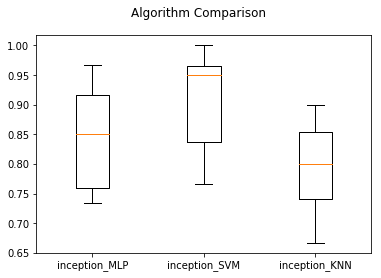

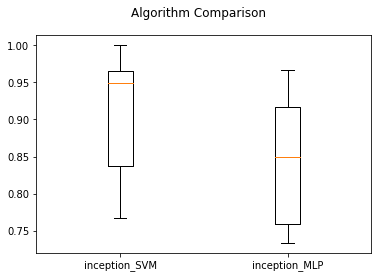

In [9]:
statisticalComparison(outputPath, datasetPath, featureExtractors, modelClassifiers, measure, nSteps, verbose)

### Train the model

The study gives us as result the best model and indicates if there are significant differences between this and the rest of the models. With this information, we can train the best model and return as a result of the framework to the user.

In [10]:
train(outputPath, datasetPath, trainingSize)

[INFO] gathering train/test splits...
[INFO] tuning hyperparameters...
[INFO] best hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 1000}
[INFO] dumping classifier...
Do you want to generate a web app to classify the images with the best combination? y/n
y


### Predict the class of the images

Finally, we have the best model and we can use it to predict the class of our images. To do this we have to use the following command and we have to define the feature extractor and the classifier.

In [13]:
image = "./example.jpg"
featExt = ["inception", "False"]
classi = "MLP"
prediction(featExt, classi, image, outputPath, datasetPath)

[INFO] loading model...
This is not the best model. Are you sure you want to predict with it?
y


IndexError: list index out of range